# L2 - Multilayer perceptron

### Papers
1. [TensorFlow](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/45166.pdf)

### TensorFlow
1. [Installing TensorFlow](https://www.tensorflow.org/install/)
2. [Basics of TensorFlow](https://www.tensorflow.org/get_started/get_started)
3. [Mnist with TensorFlow](https://www.tensorflow.org/get_started/mnist/pros)
4. [TensorFlow Mechanics](https://www.tensorflow.org/get_started/mnist/mechanics)
5. [Visualization](https://www.tensorflow.org/get_started/graph_viz)


### One more thing
1. [Jupyter tutorial](https://habrahabr.ru/company/wunderfund/blog/316826/)
2. [Plot.ly](https://plot.ly/python/)
3. [Widgets](http://jupyter.org/widgets.html)

### 1. Linear multi-classification problem

We have already learned binary linear classifier
$$y = \text{sign}(w^Tx).$$
There are [several approaches](https://en.wikipedia.org/wiki/Multiclass_classification) to solve the problem of multi-class classification. For example [reduction](https://en.wikipedia.org/wiki/Multiclass_classification#Transformation_to_Binary) of problem to binary classifier or [modification](https://en.wikipedia.org/wiki/Support_vector_machine#Multiclass_SVM) of the known model. However we are interested in approaches that is applied in neural networks.

For each class $c \in 1, \dots, |C|$ we have an individual row $w_i$ of matrix $W$. Then the probability of $x$ belonging to a particular class is equal to
$$p_i = \frac{\exp(w^T_ix)}{\sum_j \exp(w^T_jx)}.$$
This is nothing, but [softmax](https://en.wikipedia.org/wiki/Softmax_function) function of $Wx$.
$$(p_1, \dots, p_{|C|}) = \text{softmax}(Wx).$$

If you look closely, $\text{softmax}$ is a more general variant of sigmoid. To see this, it suffices to consider the case $|C|=2$. As usual the training can be reduced to minimization of the empirical risk, namely, optimization problem
$$\arg\min_W Q(W) = \arg\min_W -\frac{1}{\mathcal{l}}\sum_y\sum_i [y = i] \cdot \ln(p_i(W)).$$
Actually, the maximization of the log-likelihood is written above.

#### Exercises
1. Find $\frac{dQ}{dW}$ in matrix form (hint: start with $\frac{dQ}{dw_i}$ for begining).
2. Please plot several mnist images (e.g using grid 5x5).
3. Train linear multi-label classifier for [mnist](https://www.kaggle.com/c/digit-recognizer) dataset with TensorFlow (possible, [this tutorial](https://www.tensorflow.org/get_started/mnist/pros) can help you).
4. Chek accuracy on train and validation sets.
5. Use a local [TensorBoard instance](https://www.tensorflow.org/get_started/graph_viz) to visualize resulted graph (no need to include in lab).

In [1]:
#dQ/dwi= sum([y=i]) * ln(1+exp((-wi+w1+..+wn)Tx))exp((-wi+w1+..+wn)Tx) .T x
#-i столбец

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


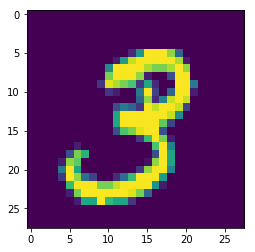

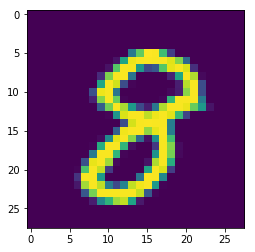

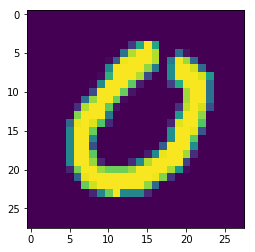

In [3]:
import matplotlib.pyplot as plt
def printNum(vector, n=28):
    from skimage.filters import threshold_mean
    import matplotlib
    import numpy as np
    import matplotlib.pyplot as plt
    image = np.array(vector).reshape(n, n)
    plt.imshow(image)
    plt.show()
printNum(mnist.train.images[1])
printNum(mnist.train.images[43])
printNum(mnist.train.images[7])

In [4]:
print(len(mnist.train.labels[0]))

10


0.9207


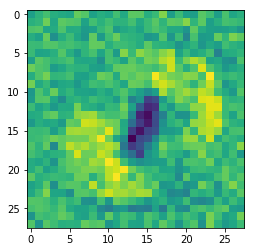

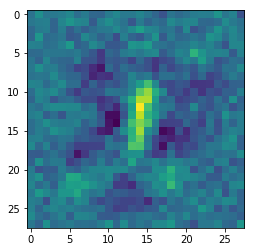

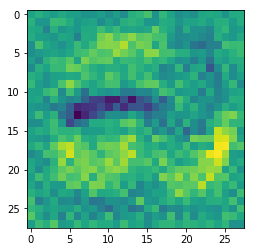

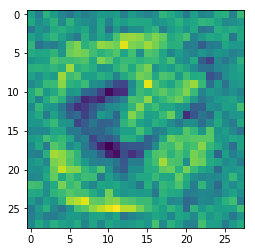

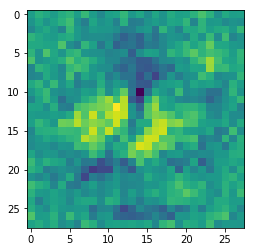

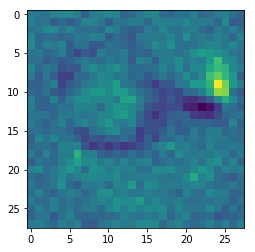

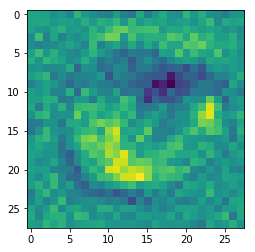

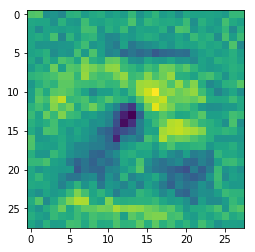

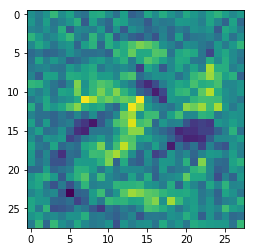

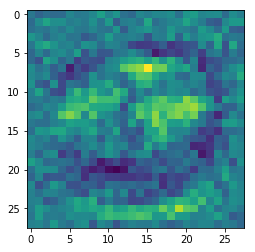

In [5]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.int32, shape=[None, 10])

W = tf.Variable(tf.truncated_normal([784, 10], stddev=0.1))
b = tf.Variable(tf.constant(0.1, shape=[10]))
y = tf.matmul(x,W) + b
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        batch = mnist.train.next_batch(100)
        train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    result = sess.run(W)
    for i in range(10):
        printNum(result.T[i])

Let's briefly touch on themes of regularization. As was discussed before, there are different approaches. We focus on the modification of loss function.

$$\arg\min_W -\frac{1}{\mathcal{l}}\sum_y\sum_i [y = i] \cdot \ln(p_i(W)) + \lambda_1 L_1(W) + \lambda_2 L_2(W)$$

1. $L_1(W) = sum_{i,j} |w_{i,j}|$ - sparsify weights (force to not use uncorrelated features)
2. $L_2(W) = sum_{i,j} w_{i,j}^2$ - minimize weights (force to not overfit)

#### Exercises
1. Train model again using both type of regularization.
2. Plot matrix of weights.
3. Which pixels have zero weights? What does it mean?
Это значит, что на этих местах не должно быть написано для данной цифры
4. Have you improved accuracy on validation?

0.8529


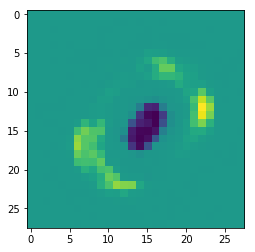

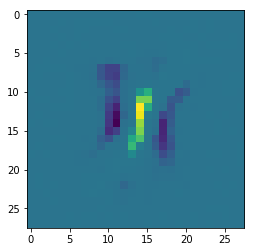

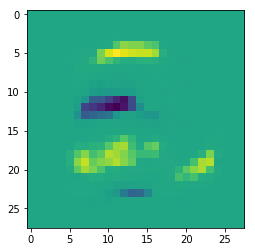

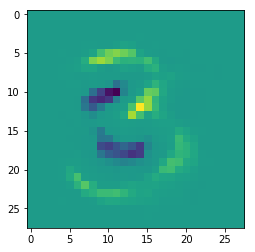

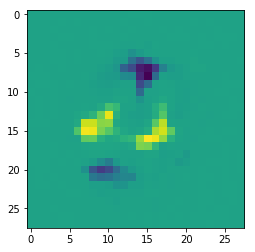

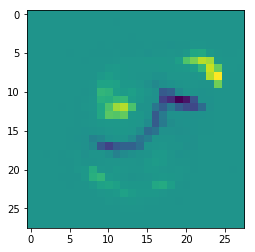

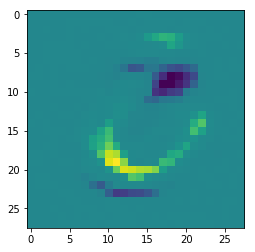

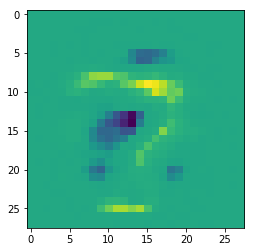

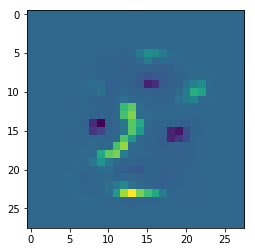

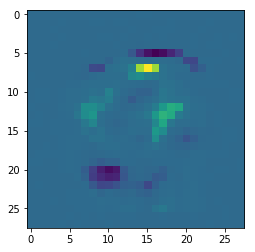

In [6]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.int32, shape=[None, 10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x,W) + b
L1 = tf.reduce_sum(tf.abs(W))
L2 = tf.reduce_sum(tf.square(W))
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y)) + 0.003 * L1 + 0.001 * L2
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        batch = mnist.train.next_batch(100)
        train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    result = sess.run(W)
    for i in range(10):
        printNum(result.T[i])

### 2. Universal approximation theorem

What if we add more layers to our model? Namely, we train two matrix $W_2$ and $W_1$
$$softmax(W_2\cdot(W_1x)).$$

At first glance adding more parameters helps to increase the generalizing ability of the model. Buy actually we have the same model $softmax(Wx)$, where $W = W_2\cdot W_1$. But everyting changes with adding ome more layer. Let's add nonlinear function $\sigma$ between $W_2$ and $W_1$

$$softmax(W_2\cdot \sigma(W_1x)).$$

Kurt Hornik showed in 1991 that it is not the specific choice of the nonlinear function, but rather the multilayer feedforward architecture itself which gives neural networks the potential of being universal approximators. The output units are always assumed to be linear. For notational convenience, only the single output case will be shown. The general case can easily be deduced from the single output case.

Let $\sigma(\cdot)$ be a nonconstant, bounded, and monotonically-increasing continuous function.
Let $\mathcal{S}_m \subset \mathbb{R}^m$ denote any compact set. 
Then, given any $\varepsilon > 0$ and any coninuous function $f$ on $\mathcal{S}_m$, there exist an integer $N$ and real constants $v_i$, $b_i$ amd real vectors $w_i$ that

$$\left| \sum _{i=1}^{N}v_{i}\sigma \left( w_i^{T} x+b_i \right) - f(x) \right| < \varepsilon, ~~~ \forall x \in \mathcal{S}_m.$$

The theorem has non-constructive proof, it meams that no estimates for $N$ and no method to find approximation's parameters.

#### Exercises
1. Let $\sigma$ – [heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function) and $x \in \{0, 1\}^2$. Prove that $y = \sigma(wx + b)$ can approximate boolean function **OR** (hint: use constructive proof).
2. What about **AND** function?
3. Is it possible to implement **XOR**? Prove your words.
4. Prove that 2-layer network can implement any boolean function.

Zochem pisat, esly mu eto delaly na uroke

Ny ladna

1) $w = (1, 1); b = -1/2$

2) $w = (1, 1); b = -3/2$

3) Заметим, что **XOR** = 1 при $(1,0);(0,1)$, значит , что никакая прямая не сможет разделить на 0 и 1 данную плоскость.

4) Вспомним, что любую булеву функцию монжо представить в виде ДНФ. Значит, первым делом произведем умножение с отрицанием, затем сложение. Сложение делается очевидно, рассмотрим умножение с отрицанием (yf ghbvtht)%

$\bar x_1 x_2 \bar x_3 x_4 \bar x_5$

$w=(-1,1,-1,1,-1); b=1-2-1/2=-3/2$, где $b$ -  $1 - num_{pol} - 1/2$

Так как максимальное значение $wx$ = количесвто положительных в коньюнкте, а любое другое означивание и должно давать 0.

#### More useful facts:
1. A 2-layer network in in $\mathbb{R}^n$ allows to define convex polyhedron..
2. A 3-layer network in в $\mathbb{R}^n$ allows to define a not necessarily convex and not even necessarily connected area.

### 3. Backpropagation
Backpropagation is a method used to calculate the error contribution of each layer after a batch of data. It is a special case of an older and more general technique called automatic differentiation. In the context of learning, backpropagation is commonly used by the gradient descent optimization algorithm to adjust the weight of layers by calculating the gradient of the loss function. This technique is also sometimes called backward propagation of errors, because the error is calculated at the output and distributed back through the network layers. The main motivation of method is simplify evaluation of gradient which is complex problem for multilayer nets.

We need the following notation. Let $(y^1,\dots,y^n) = f(x^1,\dots,x^n)$ is some differentiable function and $\frac{dy}{dx}$ is matrix
$$\frac{dy}{dx} = \Big[ J_{ij} = \frac{\partial y^i}{\partial x^j} \Big]$$

Without violating the generality, we can assume that each layer is a function $x_{i} = f(x_{i-1}, w_i)$. As last layer we add loss function, so we can assume our multi-layer net as function $Q(x_0) = Q(f_n(f_{n-1}(\dots, w_{n-1}), w_n))$.

#### Forward step
Propagation forward through the network to generate the output values. Calculation of the loss function.

#### Backward step
Let's look at last layer. We can simply find $\frac{dQ}{dx_n}$. Now we can evaluate 

$$\frac{dQ}{dw_n} = \frac{dQ}{dx_n}\frac{dx_n}{dw_n} \text{ and } \frac{dQ}{dx_{n-1}} = \frac{dQ}{dx_n}\frac{dx_n}{dx_{n-1}}$$

Now we need calculate $\frac{dQ}{dw_{n-2}}$ и $\frac{dQ}{dx_{n-2}}$. But we have the same situation. We know $\frac{dQ}{dx_k}$, so can evaluate $\frac{dQ}{dw_k}$ and $\frac{dQ}{dx_{k-1}}$. Repeating this operation we find all the gradients. Now it's only remains to make a gradient step to update weights.

#### Exercises
1. Read more about [vanishing gradient](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).
2. Train 2 layer net. Use sigmoid as nonlinearity.
3. Check accuracy on validation set.
4. Use [ReLu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) or LeakyReLu as nonlinearity. Compare accuracy and convergence with previous model.
5. Play with different architectures (add more layers, regularization and etc).
6. Show your best model.
7. How does quality change with adding layers. Prove your words, train model for 2, 3, 5, 7 and 10 layers.
8. Using backpropagation find optimal  digit 8 for your net.*

In [7]:
import tensorflow as tf
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
#1st layer
W_1 = tf.Variable(tf.truncated_normal([784,100], stddev=0.1))
b_1 = tf.Variable(tf.constant(0.1, shape=[100]))
h_1 = tf.nn.sigmoid(tf.matmul(x, W_1) + b_1) 
#2nd layer
W_2 = tf.Variable(tf.truncated_normal([100, 10], stddev=0.1))
b_2 = tf.Variable(tf.constant(0.1, shape=[10]))
y_res = tf.matmul(h_1, W_2) + b_2

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_res))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_res, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        batch = mnist.train.next_batch(100)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={
            x: batch[0], y_: batch[1]})
            print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1]})

    print('test accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels}))
sess.close()

step 0, training accuracy 0.08
step 100, training accuracy 0.82
step 200, training accuracy 0.88
step 300, training accuracy 0.92
step 400, training accuracy 0.94
step 500, training accuracy 0.86
step 600, training accuracy 0.91
step 700, training accuracy 0.94
step 800, training accuracy 0.92
step 900, training accuracy 0.96
test accuracy 0.9314


In [8]:
import tensorflow as tf
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.int32, shape=[None, 10])
#1st layer
W_1 = tf.Variable(tf.truncated_normal([784,100], stddev=0.1))
b_1 = tf.Variable(tf.constant(0.1, shape=[100]))
h_1 = tf.nn.relu(tf.matmul(x, W_1) + b_1) 
#2nd layer
W_2 = tf.Variable(tf.truncated_normal([100, 10], stddev=0.1))
b_2 = tf.Variable(tf.constant(0.1, shape=[10]))
y_res = tf.matmul(h_1, W_2) + b_2

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_res))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_res, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        batch = mnist.train.next_batch(100)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={
            x: batch[0], y_: batch[1]})
            print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1]})

    print('test accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels}))
sess.close()

step 0, training accuracy 0.07
step 100, training accuracy 0.92
step 200, training accuracy 0.92
step 300, training accuracy 0.96
step 400, training accuracy 0.94
step 500, training accuracy 0.95
step 600, training accuracy 0.95
step 700, training accuracy 0.94
step 800, training accuracy 0.98
step 900, training accuracy 0.95
test accuracy 0.9616


In [9]:
def create_your_neyro(sizes, nonlinearity, batch_s = 64, steps = 1000, regularized=False):
    #fill variables
    lamb1 = 0.00003
    lamb2 = 0.0001
    
    x = tf.placeholder(tf.float32, shape=[None, sizes[0]])
    y_ = tf.placeholder(tf.float32, shape=[None, 10])
    n = len(sizes) - 1
    W = list()
    b = list()
    for i in range(n):
        W.append(tf.Variable(tf.truncated_normal([sizes[i],sizes[i + 1]], stddev=0.1, dtype=tf.float32)))
        b.append(tf.Variable(tf.constant(0.1, shape=[sizes[i + 1]], dtype=tf.float32)))
    x_ = list()
    x_.append(x)
    L1 = 0
    L2 = 0
    for i in range(n - 1):
        if nonlinearity == 'relu':
            x_.append(tf.nn.relu(tf.matmul(x_[i], W[i]) + b[i]))
        elif nonlinearity == 'sigma':
            x_.append(tf.nn.sigmoid(tf.matmul(x_[i], W[i]) + b[i]))
        L1 += tf.reduce_sum(tf.abs(W[i]))
        L2 += tf.reduce_sum(tf.square(W[i]))
    y_res = tf.matmul(x_[n - 1], W[n - 1]) + b[n - 1]
    if regularized:
        cross_entropy = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_res)) + lamb1 * L1 + lamb2 * L2
    else:
        cross_entropy = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_res))
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
    
    correct_prediction = tf.equal(tf.argmax(y_res, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(steps):
            batch = mnist.train.next_batch(batch_s)
            #if i % int(steps / 2) == 0:
                #train_accuracy = accuracy.eval(feed_dict={
                #x: batch[0], y_: batch[1]})
                #print('step %d, training accuracy %g' % (i, train_accuracy))
            train_step.run(feed_dict={x: batch[0], y_: batch[1]})
        print('sizes:', sizes, ' nonlinearity:', nonlinearity, ' batch size:',
              batch_s, ' steps:', steps, ' regularized:', regularized)
        print('test accuracy %g' % accuracy.eval(feed_dict={
            x: mnist.test.images, y_: mnist.test.labels}))

In [10]:
create_your_neyro([784, 100, 10], 'relu')
create_your_neyro([784, 100, 10], 'relu', regularized=True)
create_your_neyro([784, 500, 100, 10], 'sigma')
create_your_neyro([784, 500, 200, 100, 50, 10], 'relu', regularized=False)
create_your_neyro([784, 500, 200, 100, 50, 10], 'relu', regularized=True)
create_your_neyro([784, 600, 500, 400, 300, 200, 50, 10], 'sigma', batch_s=100, steps=2000)
create_your_neyro([784, 500, 200, 100, 50, 10], 'relu', regularized=True)
create_your_neyro([784, 500, 100, 10], 'relu', steps=10000)
#create_your_neyro([784, 100, 10], 'relu')

sizes: [784, 100, 10]  nonlinearity: relu  batch size: 64  steps: 1000  regularized: False
test accuracy 0.9619
sizes: [784, 100, 10]  nonlinearity: relu  batch size: 64  steps: 1000  regularized: True
test accuracy 0.9617
sizes: [784, 500, 100, 10]  nonlinearity: sigma  batch size: 64  steps: 1000  regularized: False
test accuracy 0.9137
sizes: [784, 500, 200, 100, 50, 10]  nonlinearity: relu  batch size: 64  steps: 1000  regularized: False
test accuracy 0.9559
sizes: [784, 500, 200, 100, 50, 10]  nonlinearity: relu  batch size: 64  steps: 1000  regularized: True
test accuracy 0.9551
sizes: [784, 600, 500, 400, 300, 200, 50, 10]  nonlinearity: sigma  batch size: 100  steps: 2000  regularized: False
test accuracy 0.1135
sizes: [784, 500, 200, 100, 50, 10]  nonlinearity: relu  batch size: 64  steps: 1000  regularized: True
test accuracy 0.9617
sizes: [784, 500, 100, 10]  nonlinearity: relu  batch size: 64  steps: 10000  regularized: False
test accuracy 0.9826


#### Делаем красивую восьмерку
1. Находим лучшую $W$ по уже протоптанным шагам
2. Ищем картинку 8, дающую минимальное 

In [17]:
import tensorflow as tf
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.int32, shape=[None, 10])
W_1 = tf.Variable(tf.truncated_normal([784,10], stddev=0.1))
b_1 = tf.Variable(tf.constant(0.1, shape=[10]))
y_res = tf.matmul(x, W_1) + b_1

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_res))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_res, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        batch = mnist.train.next_batch(100)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={
            x: batch[0], y_: batch[1]})
            print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    W_8 = sess.run(W_1, feed_dict={x: mnist.train.images, y_: mnist.train.labels})
    b_8 = sess.run(b_1, feed_dict={x: mnist.train.images, y_: mnist.train.labels})

step 0, training accuracy 0.05
step 100, training accuracy 0.87
step 200, training accuracy 0.93
step 300, training accuracy 0.9
step 400, training accuracy 0.87
step 500, training accuracy 0.92
step 600, training accuracy 0.94
step 700, training accuracy 0.91
step 800, training accuracy 0.96
step 900, training accuracy 0.97
step 1000, training accuracy 0.85
step 1100, training accuracy 0.88
step 1200, training accuracy 0.95
step 1300, training accuracy 0.9
step 1400, training accuracy 0.92
step 1500, training accuracy 0.93
step 1600, training accuracy 0.93
step 1700, training accuracy 0.86
step 1800, training accuracy 0.86
step 1900, training accuracy 0.92


In [18]:
import numpy as np
best_8 = np.zeros([10], dtype=np.float32)
best_8[8] = 1

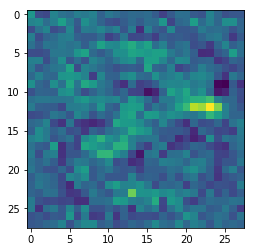

In [19]:
x = tf.Variable(tf.zeros([1, 784]))
h_1 = tf.matmul(x, W_8) + b_8

find_8 = tf.reduce_sum(tf.abs(h_1 - best_8))
train_step = tf.train.GradientDescentOptimizer(0.0001).minimize(find_8)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        train_step.run()
        #if i % 100 == 0:
            #cur = find_8.eval()
            #cur1 = h_1.eval()
            #print(abs(cur1 - best_8))
    result = sess.run(x)
    printNum(result)

### 4. Autoencoders
An autoencoder is an network used for unsupervised learning of efficient codings. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction. Also, this technique can be used to train deep nets.

Architecturally, the simplest form of an autoencoder is a feedforward net very similar to the multilayer perceptron (MLP), but with the output layer having the same number of nodes as the input layer, and with the purpose of reconstructing its own inputs. Therefore, autoencoders are unsupervised learning models. An autoencoder always consists of two parts, the encoder and the decoder. Encoder returns latent representation of the object (compressed representation, usuallu smaller dimension), but decoder restores object from this latent representation. Autoencoders are also trained to minimise reconstruction errors (e.g. MSE).

Various techniques exist to prevent autoencoders from learning the identity and to improve their ability to capture important information:
1. Denoising autoencoder - take a partially corrupted input.
2. Sparse autoencoder - impose sparsity on the hidden units during training (whilst having a larger number of hidden units than inputs).
3. Variational autoencoder models inherit autoencoder architecture, but make strong assumptions concerning the distribution of latent variables.
4. Contractive autoencoder - add an explicit regularizer in objective function that forces the model to learn a function that is robust to slight variations of input values.

#### Exercises
1. Train 2 layers autoencoder that compressed mnist images to $\mathbb{R}^3$ space.
2. For each digit plot several samples in 3D axis (use "%matplotlib notebook" mode or plotly). How do digits group?
3. Train autoencoder with more layers. What are results?
4. Use autoencoder to pretrain 2 layers (unsupervised) and then train the following layers with supervised method.

on step 0 current value of func: 4.33091e+07
on step 100 current value of func: 3.29989e+06
on step 200 current value of func: 2.41241e+06
on step 300 current value of func: 1.89505e+06
on step 400 current value of func: 1.69245e+06
on step 500 current value of func: 1.58338e+06
on step 600 current value of func: 1.47948e+06
on step 700 current value of func: 1.43413e+06
on step 800 current value of func: 1.41782e+06
on step 900 current value of func: 1.40647e+06


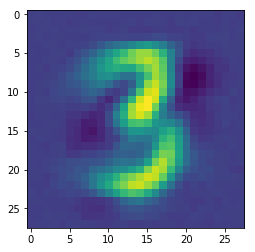

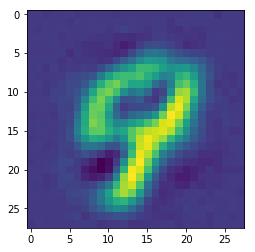

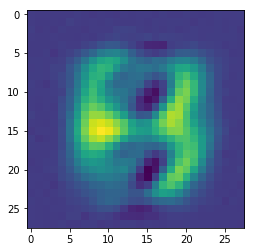

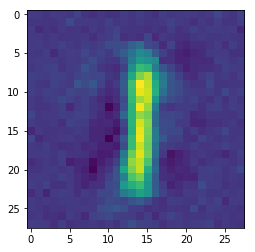

In [20]:
import tensorflow as tf
import numpy as np
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 784])

W_1 = tf.Variable(tf.truncated_normal([784,400], stddev=0.1))
b_1 = tf.Variable(tf.constant(0.1, shape=[400]))
h_1 = tf.nn.relu(tf.matmul(x, W_1) + b_1) 

W_2 = tf.Variable(tf.truncated_normal([400, 784], stddev=0.1))
b_2 = tf.Variable(tf.constant(0.1, shape=[784]))
x_res = tf.matmul(h_1, W_2) + b_2

autoencoder = tf.reduce_sum(tf.square(x - x_res))
train_step = tf.train.AdamOptimizer(0.001).minimize(autoencoder)
cur = tf.reduce_sum(tf.square(x - x_res))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        batch = mnist.train.next_batch(60)
        train_step.run(feed_dict={x: batch[0]})
        if i % 100 == 0:
            cur_z = sess.run(cur, feed_dict={x: mnist.train.images})
            print('on step', i, 'current value of func:', cur_z)
    X = sess.run(x_res, feed_dict={x: mnist.train.images})
    printNum(X[0])
    printNum(X[10])
    printNum(X[100])
    printNum(X[1000])

on step 0 current value of func: 4.26969e+06
on step 100 current value of func: 2.77942e+06
on step 200 current value of func: 2.52033e+06
on step 300 current value of func: 2.46387e+06
on step 400 current value of func: 2.42476e+06
on step 500 current value of func: 2.38366e+06
on step 600 current value of func: 2.35394e+06
on step 700 current value of func: 2.32646e+06
on step 800 current value of func: 2.29942e+06
on step 900 current value of func: 2.27855e+06


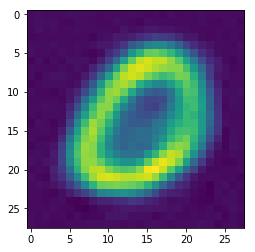

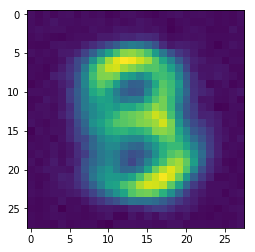

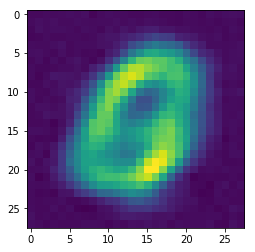

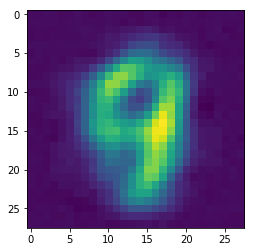

In [49]:
import tensorflow as tf
import numpy as np
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 784])

W_1 = tf.Variable(tf.truncated_normal([784,49], stddev=0.1))
b_1 = tf.Variable(tf.constant(0.1, shape=[49]))
h_1 = tf.nn.relu(tf.matmul(x, W_1) + b_1) 

W_2 = tf.Variable(tf.truncated_normal([49,3], stddev=0.1))
b_2 = tf.Variable(tf.constant(0.1, shape=[3]))
h_2_for_out = tf.matmul(h_1, W_2) + b_2
h_2 = tf.nn.relu(h_2_for_out)

W_3 = tf.Variable(tf.truncated_normal([3, 49], stddev=0.1))
b_3 = tf.Variable(tf.constant(0.1, shape=[49]))
h_3 = tf.nn.relu(tf.matmul(h_2, W_3) + b_3) 

W_4 = tf.Variable(tf.truncated_normal([49, 784], stddev=0.1))
b_4 = tf.Variable(tf.constant(0.1, shape=[784]))
x_res = tf.matmul(h_3, W_4) + b_4

autoencoder = tf.reduce_sum(tf.square(x - x_res))
train_step = tf.train.AdamOptimizer(0.001).minimize(autoencoder)
cur = tf.reduce_sum(tf.square(x - x_res))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        batch = mnist.train.next_batch(60)
        train_step.run(feed_dict={x: batch[0]})
        if i % 100 == 0:
            cur_z = sess.run(cur, feed_dict={x: mnist.train.images})
            print('on step', i, 'current value of func:', cur_z)
    X = sess.run(x_res, feed_dict={x: mnist.train.images})
    in3 = sess.run(h_2_for_out, feed_dict={x: mnist.train.images})
    printNum(X[0])
    printNum(X[10])
    printNum(X[100])
    printNum(X[1000])

In [50]:
import plotly 
plotly.tools.set_credentials_file(username='foxxmary', api_key='CKPpmmLdHgYSQCjAKdI7')

In [51]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
num_points = 50
lb = np.zeros((11, num_points), dtype=np.int32)
point = np.zeros(10, dtype=np.int32)
for i in range(num_points * 20):
    j = 0
    while mnist.train.labels[i][j] != 1:
        j += 1
    if point[j] < num_points:
        lb[j][point[j]] = i
        point[j] += 1

data = []
for i in range(10):
    trace = go.Scatter3d(
        x=in3.T[0][lb[i]],
        y=in3.T[1][lb[i]],
        z=in3.T[2][lb[i]],
        mode='markers',
        marker=dict(
            size=5,
            line=dict(
                color='rgba(%d, %d, %d, 0.14)' % (((i + 10) * 25) % 255,
                                                  ((i + 5)^3) % 255,
                                                  (i * 500) % 255),
                width=0.5
            ),
            opacity=0.8
        )
    )
    data.append(trace)
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')
#разделены типо плоскостями, с D=0

In [27]:
import tensorflow as tf
import numpy as np
def create_your_autoencoder(sizes, nonlinearity, batch_s=64, steps=1000, regularized=False):
    #fill variables
    lamb1 = 0.00003
    lamb2 = 0.0001
    n = len(sizes) - 1
    j = len(sizes) - 2
    for i in range(len(sizes) - 1):
        sizes.append(sizes[j])
        j -= 1
    n = len(sizes) - 1
    x = tf.placeholder(tf.float32, shape=[None, 784])
    y_ = tf.placeholder(tf.float32, shape=[None, 10])
    W = list()
    b = list()
    for i in range(n):
        W.append(tf.Variable(tf.truncated_normal([sizes[i],sizes[i + 1]], stddev=0.1, dtype=tf.float32)))
        b.append(tf.Variable(tf.constant(0.1, shape=[sizes[i + 1]], dtype=tf.float32)))
    x_ = list()
    x_.append(x)
    L1 = 0
    L2 = 0
    for i in range(n - 1):
        if nonlinearity == 'relu':
            x_.append(tf.nn.relu(tf.matmul(x_[i], W[i]) + b[i]))
        elif nonlinearity == 'sigma':
            x_.append(tf.nn.sigmoid(tf.matmul(x_[i], W[i]) + b[i]))
        L1 += tf.reduce_sum(tf.abs(W[i]))
        L2 += tf.reduce_sum(tf.square(W[i]))
    x_res = tf.matmul(x_[n - 1], W[n - 1]) + b[n - 1]
    
    autoencoder = tf.reduce_sum(tf.square(x - x_res))
    train_step = tf.train.AdamOptimizer(0.001).minimize(autoencoder)
    cur = tf.reduce_sum(tf.square(x - x_res))
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(steps):
            batch = mnist.train.next_batch(batch_s)
            train_step.run(feed_dict={x: batch[0]})
            #if i % 100 == 0:
                #cur_z = sess.run(cur, feed_dict={x: mnist.train.images})
                #print('on step', i, 'current value of func:', cur_z)
        print('sizes:', sizes, ' nonlinearity:', nonlinearity, ' batch size:',
              batch_s, ' steps:', steps, ' regularized:', regularized)   
        print('test accuracy %g' % sess.run(cur, feed_dict={x: mnist.train.images}))
        outW = sess.run(W[:int((len(sizes) - 1) / 2)], feed_dict={x: mnist.train.images})
        outb = sess.run(b[:int((len(sizes) - 1) / 2)], feed_dict={x: mnist.train.images})
        X = sess.run(x_res, feed_dict={x: mnist.train.images})
        printNum(X[0])
    return outW, outb

sizes: [784, 400, 200, 100, 20, 100, 200, 400, 784]  nonlinearity: relu  batch size: 64  steps: 1000  regularized: False
test accuracy 1.60043e+06


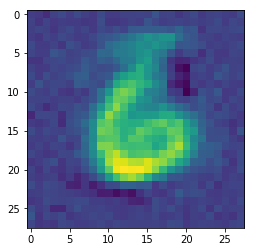

sizes: [784, 400, 200, 100, 20, 100, 200, 400, 784]  nonlinearity: relu  batch size: 64  steps: 100  regularized: False
test accuracy 2.66237e+06


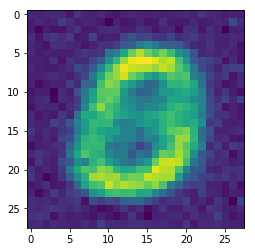

sizes: [784, 50, 784]  nonlinearity: sigma  batch size: 64  steps: 1000  regularized: False
test accuracy 893866


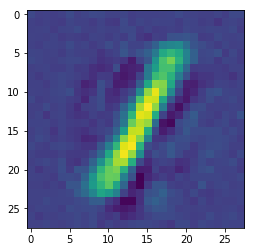

sizes: [784, 100, 10, 100, 784]  nonlinearity: relu  batch size: 64  steps: 1000  regularized: True
test accuracy 1.72952e+06


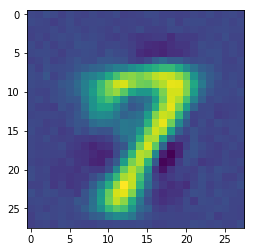

sizes: [784, 600, 500, 400, 300, 200, 100, 2, 100, 200, 300, 400, 500, 600, 784]  nonlinearity: sigma  batch size: 64  steps: 1000  regularized: False
test accuracy 2.89882e+06


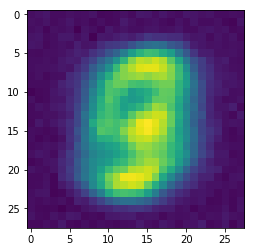

sizes: [784, 200, 50, 12, 50, 200, 784]  nonlinearity: relu  batch size: 64  steps: 1000  regularized: False
test accuracy 1.46052e+06


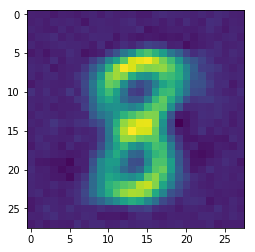

([array([[ 0.06153046, -0.00969897, -0.03055033, ...,  0.00840324,
          -0.06116806, -0.12494035],
         [-0.1559847 , -0.1598046 ,  0.18422584, ...,  0.06918272,
           0.15408008,  0.16736244],
         [ 0.0007486 ,  0.07960328, -0.03069089, ..., -0.11974745,
          -0.04953995,  0.07396534],
         ..., 
         [-0.09247629,  0.10059189, -0.01345328, ...,  0.06225219,
           0.09945966,  0.06356647],
         [-0.1948574 , -0.08252057,  0.07255688, ..., -0.07887762,
           0.07144045,  0.04472269],
         [ 0.06117414,  0.00053894,  0.15768844, ...,  0.00558511,
          -0.15110233,  0.02098477]], dtype=float32),
  array([[-0.06112692, -0.04884848, -0.03268203, ...,  0.09784595,
          -0.08947401,  0.00831204],
         [-0.15656725, -0.02900049, -0.08597784, ...,  0.14871269,
          -0.19184451, -0.05994678],
         [-0.06576081, -0.07983014,  0.00480583, ...,  0.00626717,
          -0.03579704,  0.09628787],
         ..., 
         [ 0.0649

In [28]:
create_your_autoencoder([784, 400, 200, 100, 20], 'relu')
create_your_autoencoder([784, 400, 200, 100, 20], 'relu', steps=100)
create_your_autoencoder([784, 50], 'sigma')
create_your_autoencoder([784, 100, 10], 'relu', regularized=True)
create_your_autoencoder([784, 600, 500, 400, 300, 200, 100, 2], 'sigma')
create_your_autoencoder([784, 200, 50, 12], 'relu')

In [31]:
def create_your_neyro_with_autoencoder(sizes,
                                       nonlinearity,
                                       W_a, b_a,
                                       nonlinearity_a,
                                       batch_s = 64,
                                       steps = 1000,
                                       regularized=False):
    #fill variables
    lamb1 = 0.00003
    lamb2 = 0.0001
    
    x = tf.placeholder(tf.float32, shape=[None, 784])
    x_new = list()
    x_new.append(x)
    for i in range(len(W_a) - 1):
        if nonlinearity_a == 'relu':
            x_new.append(tf.nn.relu(tf.matmul(x_new[i], W_a[i]) + b_a[i]))
        elif nonlinearity_a == 'sigma':
            x_new.append(tf.nn.sigmoid(tf.matmul(x_new[i], W_a[i]) + b_a[i]))
    x_new.append(tf.matmul(x_new[len(W_a) - 1], W_a[len(W_a) - 1]) + b_a[len(W_1) - 1])
    y_ = tf.placeholder(tf.float32, shape=[None, 10])
    n = len(sizes) - 1
    W = list()
    b = list()
    for i in range(n):
        W.append(tf.Variable(tf.truncated_normal([sizes[i],sizes[i + 1]], stddev=0.1, dtype=tf.float32)))
        b.append(tf.Variable(tf.constant(0.1, shape=[sizes[i + 1]], dtype=tf.float32)))
    
    x_ = list()
    x_.append(x_new[len(x_new) - 1])
    L1 = 0
    L2 = 0
    for i in range(n - 1):
        if nonlinearity == 'relu':
            x_.append(tf.nn.relu(tf.matmul(x_[i], W[i]) + b[i]))
        elif nonlinearity == 'sigma':
            x_.append(tf.nn.sigmoid(tf.matmul(x_[i], W[i]) + b[i]))
        L1 += tf.reduce_sum(tf.abs(W[i]))
        L2 += tf.reduce_sum(tf.square(W[i]))
    y_res = tf.matmul(x_[n - 1], W[n - 1]) + b[n - 1]
    
    if regularized:
        cross_entropy = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_res)) + lamb1 * L1 + lamb2 * L2
    else:
        cross_entropy = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_res))
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
    
    correct_prediction = tf.equal(tf.argmax(y_res, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(steps):
            batch = mnist.train.next_batch(batch_s)
            #if i % int(steps / 2) == 0:
                #train_accuracy = accuracy.eval(feed_dict={
                #x: batch[0], y_: batch[1]})
                #print('step %d, training accuracy %g' % (i, train_accuracy))
            
            train_step.run(feed_dict={x: batch[0], y_: batch[1]})
        #outW = sess.run(W, feed_dict={x: mnist.train.images})
        #outb = sess.run(b, feed_dict={x: mnist.train.images})
        print('sizes:', sizes, ' nonlinearity:', nonlinearity, ' batch size:',
              batch_s, ' steps:', steps, ' regularized:', regularized)
        print('test accuracy %g' % accuracy.eval(feed_dict={
            x: mnist.test.images, y_: mnist.test.labels}))
        #return outW, outb

sizes: [784, 500, 300, 200, 300, 500, 784]  nonlinearity: sigma  batch size: 100  steps: 2000  regularized: False
test accuracy 730696


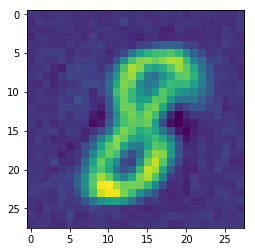

sizes: [200, 100, 30, 10]  nonlinearity: relu  batch size: 64  steps: 2000  regularized: False
test accuracy 0.9684


In [32]:
W_1, b_1 = create_your_autoencoder([784, 500, 300, 200], 'sigma', steps=2000, batch_s = 100)
create_your_neyro_with_autoencoder([200, 100, 30, 10],'relu', W_1, b_1,'sigma', steps=2000, batch_s = 64)

sizes: [784, 500, 300, 200, 300, 500, 784]  nonlinearity: sigma  batch size: 64  steps: 2000  regularized: False
test accuracy 775801


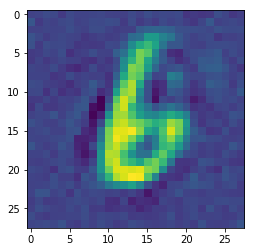

sizes: [200, 100, 30, 10]  nonlinearity: relu  batch size: 100  steps: 2000  regularized: False
test accuracy 0.971


In [33]:
W_1, b_1 = create_your_autoencoder([784, 500, 300, 200], 'sigma', steps=2000)
create_your_neyro_with_autoencoder([200, 100, 30, 10],'relu', W_1, b_1,'sigma', steps=2000, batch_s = 100)

sizes: [784, 500, 400, 300, 400, 500, 784]  nonlinearity: sigma  batch size: 64  steps: 2000  regularized: False
test accuracy 663964


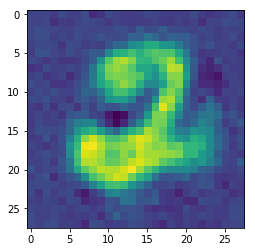

sizes: [300, 150, 50, 10]  nonlinearity: relu  batch size: 100  steps: 2000  regularized: False
test accuracy 0.9691


In [34]:
W_1, b_1 = create_your_autoencoder([784, 500, 400, 300], 'sigma', steps=2000)
create_your_neyro_with_autoencoder([300, 150, 50, 10],'relu', W_1, b_1,'sigma', steps=2000, batch_s = 100)

sizes: [784, 500, 400, 300, 400, 500, 784]  nonlinearity: sigma  batch size: 64  steps: 2000  regularized: False
test accuracy 663679


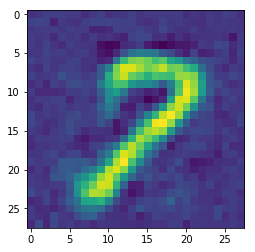

sizes: [300, 150, 50, 10]  nonlinearity: relu  batch size: 100  steps: 2000  regularized: True
test accuracy 0.9678


In [35]:
W_1, b_1 = create_your_autoencoder([784, 500, 400, 300], 'sigma', steps=2000)
create_your_neyro_with_autoencoder([300, 150, 50, 10],'relu', W_1, b_1,'sigma', steps=2000, batch_s = 100, regularized=True)

sizes: [784, 400, 300, 400, 784]  nonlinearity: sigma  batch size: 64  steps: 2000  regularized: False
test accuracy 388874


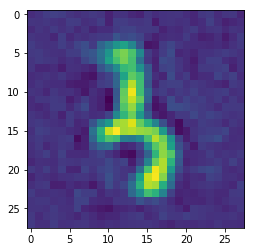

sizes: [300, 50, 10]  nonlinearity: relu  batch size: 100  steps: 2000  regularized: False
test accuracy 0.9699


In [36]:
W_1, b_1 = create_your_autoencoder([784, 400, 300], 'sigma', steps=2000)
create_your_neyro_with_autoencoder([300, 50, 10],'relu', W_1, b_1,'sigma', steps=2000, batch_s = 100)

sizes: [784, 300, 100, 300, 784]  nonlinearity: sigma  batch size: 64  steps: 2000  regularized: False
test accuracy 638952


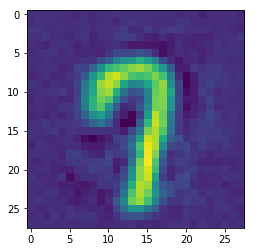

sizes: [100, 50, 10]  nonlinearity: relu  batch size: 150  steps: 2000  regularized: False
test accuracy 0.97


In [37]:
W_1, b_1 = create_your_autoencoder([784, 300, 100], 'sigma', steps=2000)
create_your_neyro_with_autoencoder([100, 50, 10],'relu', W_1, b_1,'sigma', steps=2000, batch_s = 150)